In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [7]:
# Input: (Parquet File) mapillary coverage lines per tile 

# Output: Buffered lines per tile for pano only and all

In [8]:
import glob

parquet_files = glob.glob("ml_output/mapillary_coverage_DE-*.parquet")
mapillary_coverage = gpd.GeoDataFrame(pd.concat([gpd.read_parquet(f) for f in parquet_files], ignore_index=True))

mapillary_coverage

,geometry,captured_at,creator_id,id,image_id,is_pano,tile_x,tile_y,organization_id
0,"MULTILINESTRING ((9.90967 50.71841, 9.91036 50...",2023-11-03,102976398952710,QIvRdog51kLwKStODMl96u,284583047888519,False,8643,5505,NaN
1,"LINESTRING (9.91667 50.71961, 9.9167 50.71961,...",2023-11-03,102976398952710,pnNwBZA0fUek1oiIGu69qD,842321264269748,False,8643,5505,NaN
2,"LINESTRING (9.93164 51.37102, 9.9318 51.37113,...",2023-08-25,109752671252812,YoOiu5zpJf69IrEWAlxVLH,829140848607036,False,8644,5458,NaN
3,"LINESTRING (9.95053 51.35843, 9.95052 51.35839)",2025-05-13,102468835332129,Nm3PTGjFCIs49bf1pEH7wL,1769557033774522,False,8644,5458,NaN
4,"LINESTRING (9.93164 51.371, 9.93206 51.37127, ...",2023-08-25,109752671252812,qVZ3bXcCs5hPMLyO28J9ed,834800741697508,False,8644,5458,NaN
...,...,...,...,...,...,...,...,...,...
886698,"LINESTRING (11.27197 54.41679, 11.27223 54.416...",2025-06-20,102923368613804,YonUfQTgW0XFaCrZSDKy6w,1945022226314852,False,8705,5228,NaN
886699,"LINESTRING (11.27252 54.41665, 11.27267 54.416...",2025-06-20,102923368613804,W4D09N7mFqjc56tAS2yzvh,534028509794768,False,8705,5228,NaN
886700,"LINESTRING (11.29394 54.41217, 11.29362 54.412...",2025-06-20,102923368613804,kCmviT24e9ybVKD0uzqhpO,1416873349588918,False,8705,5228,NaN
886701,"LINESTRING (11.29395 54.41219, 11.29584 54.412...",2025-06-20,102923368613804,W4D09N7mFqjc56tAS2yzvh,534028509794768,False,8706,5228,NaN


In [4]:
#mapillary_coverage_23_bb = gpd.read_parquet("mapillary_coverage_23_bb.parquet")
#mapillary_coverage_23_bb = gpd.read_parquet("mapillary_coverage_23_germany_2025-03-30.parquet")

#mapillary_coverage = gpd.read_parquet("mapillary_coverage_alltime_berlin_2025-04-02.parquet")


# Germany april 25
#mapillary_coverage = gpd.read_parquet("output_germany/mapillary_coverage_from23-01-01_germany_combined_output_full_april.parquet")

# Berlin may 25
#mapillary_coverage = gpd.read_parquet("output_berlin_2025-05-10_combined/mapillary_coverage_from23-01-01_berlin_combined_output_full_2025-05-10.parquet")

# Germany may 25
#mapillary_coverage = gpd.read_parquet("output_germany_2025-05_combined/mapillary_coverage_from23-01-01_germany_combined_output_full_2025-05-11.parquet")



Text(0.5, 1.0, 'Germany - later than 2023-01-01: Both Pano and Non-Pano')

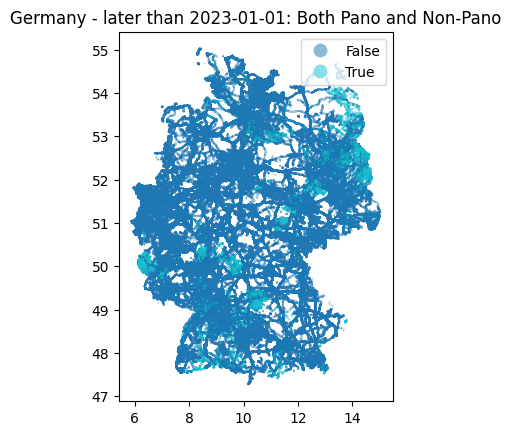

In [9]:
ax = mapillary_coverage.plot(column="is_pano", alpha=0.5, legend=True)
#plt.title("No Time Filter: Both Pano and Non-Pano")
plt.title("Germany - later than 2023-01-01: Both Pano and Non-Pano")

In [10]:
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland=bland[bland["id"].isin(["DE-BE"])]

In [11]:
bland.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Berlin - later than 2023-01-01: Both Pano and Non-Pano')

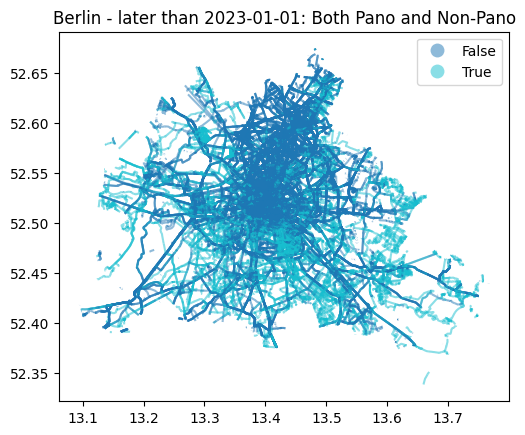

In [12]:
mapillary_coverage_clipped = mapillary_coverage.clip(bland)

ax = mapillary_coverage_clipped.plot(column="is_pano", alpha=0.5, legend=True)
#plt.title("No Time Filter: Both Pano and Non-Pano")
plt.title("Berlin - later than 2023-01-01: Both Pano and Non-Pano")

In [13]:
from datetime import datetime
import pandas as pd

# Convert 'captured_at' to datetime
mapillary_coverage_clipped['captured_at'] = pd.to_datetime(mapillary_coverage_clipped['captured_at'])

# Create a naive Timestamp with the desired date (no timezone information)
filter_date = pd.Timestamp(datetime(2025, 1, 1))

# Filter rows where 'captured_at' is after January 1, 2023
filtered_mapillary_coverage = mapillary_coverage_clipped[
    mapillary_coverage_clipped['captured_at'] >= filter_date
]

Text(0.5, 1.0, 'later than 2025-01-01: Both Pano and Non-Pano')

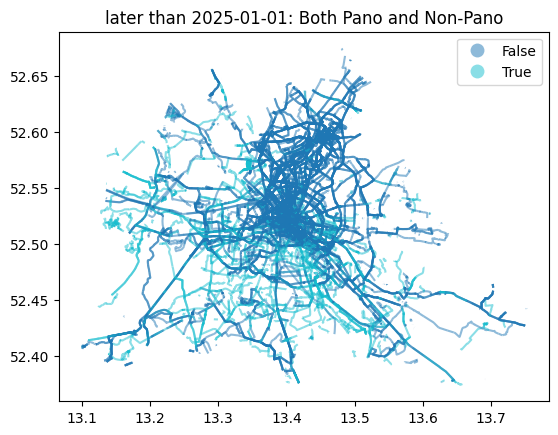

In [14]:
from datetime import datetime, timezone
ax = filtered_mapillary_coverage.plot(column="is_pano", alpha=0.5, legend=True)
plt.title("later than 2025-01-01: Both Pano and Non-Pano")

In [ ]:

# berlin both pano and non-pano ~ 1min
## Germany: both pano and non-pano ~ 25min

## 25-05-12:
## Germany: both pano and non-pano ~ 11min

## 25-10-07:
## Germany: both pano and non-pano ~ 8min



#input_file = mapillary_coverage_clipped
input_file = mapillary_coverage



#filtered_mapillary_coverage_pano=mapillary_coverage[mapillary_coverage.is_pano==True]

# expolde the geometry to make buffering faster
mapillary_coverage_exploded = input_file.explode(index_parts=False, ignore_index=True)

# create 10m buffers for all the lines
mapillary_coverage_buffered = mapillary_coverage_exploded.to_crs(25832).copy()
mapillary_coverage_buffered['geometry'] = mapillary_coverage_buffered['geometry'].buffer(10)


mapillary_coverage_dissolved = mapillary_coverage_buffered.dissolve(by=['tile_x', 'tile_y','is_pano'])

mapillary_coverage_dissolved=mapillary_coverage_dissolved.reset_index()





In [16]:
# keep only necessary columns
mapillary_coverage_dissolved_cleaned = mapillary_coverage_dissolved[['tile_x', 'tile_y', 'is_pano', 'geometry']].copy()
## todo: keep only tile_x	tile_y	is_pano	geometry; other columns are not needed and also wrong (dissolve)

<Axes: >

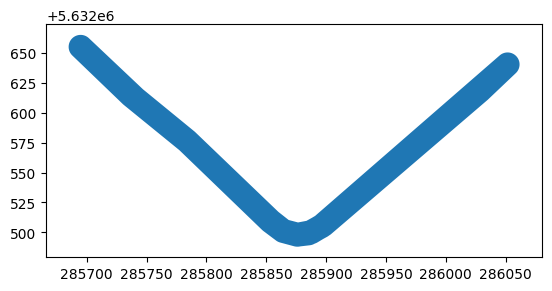

In [17]:
mapillary_coverage_dissolved_cleaned[mapillary_coverage_dissolved_cleaned.is_pano==True][:1].plot()

In [18]:

# write dissolved buffered file
mapillary_coverage_dissolved_cleaned.to_parquet("ml_output/mapillary_coverage_germany_buffered10m_dissolved_23-01-01_until_25-10-07.parquet")